In [1]:
%load_ext autoreload
%autoreload 2

In [170]:
import numpy as np
from diffeqpy import de # 初回は５-１０分程度かかるかも
import matplotlib.pyplot as plt
from juliacall import Main as jl
from SanoSawada import SanoSawada
import numpy as np

# Lorenz 方程式の場合

In [246]:
# parameters
transient = 20.
t_end = 2000.
dt = 1e-2
p = np.array([16.,40.,4.])
u0 = np.array([2.,0.,0.])

obs_idx = 0
epsilon = 0.015
num_neighbor = 6
step_jac = 10
jac_len = 1000
td_idx = -10*np.array([0,1,2])

lorenz = de.seval("""
function lorenz(du,u,p,t)
    du[1] = p[1] * (u[2] - u[1])
    du[2] = u[1] * (p[2] - u[3]) - u[2]
    du[3] = u[1] * u[2] - p[3] * u[3]
end""")

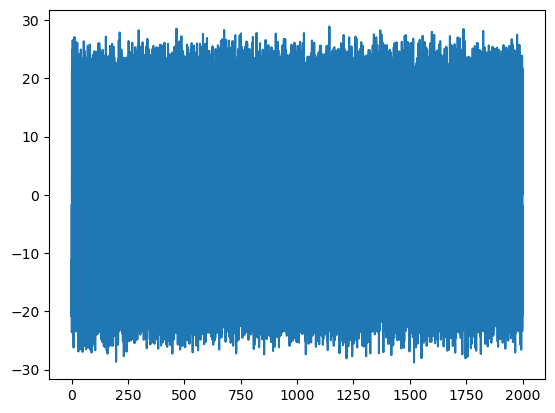

In [252]:
u0 = np.array([2.,0.,0.])

# transient 
tspan = (0., transient)
prob = de.ODEProblem(lorenz, u0, tspan, p)
sol = de.solve(prob)

# steps_on_attractor
u0 = sol.u[-1]
tspan = (0., t_end)
prob = de.ODEProblem(lorenz, u0, tspan, p)
sol = de.solve(prob,saveat=dt)

# convert sol to numpy array
sol_t = np.array(sol.t)
sol_partial_obs = np.stack([u_i[obs_idx] for u_i in sol.u])

plt.plot(sol_t,sol_partial_obs)
plt.show()

In [253]:
ss = SanoSawada(sol_partial_obs,num_neighbor,dt,step_jac,jac_len,epsilon,td_idx)
ss.set_radius_of_ball_for_neighboring_points_search()
print(ss.radius)
ss.jacobian_reconstruction()
ss.bns_steps()
ss.estimate_lyapunov_spectrum(length=jac_len)

0.8646874439693223
[[ 5.36539794e+00  1.14654214e+00 -3.89611014e+00]
 [ 5.30421723e+00 -6.44239309e-01  2.33751422e-01]
 [ 3.70963228e+00 -7.83801984e-01 -8.35403844e-01]
 ...
 [-7.15085309e+02 -7.40726500e+02 -7.44440072e+02]
 [-7.15085309e+02            -inf            -inf]
 [-7.15085309e+02 -7.44440072e+02            -inf]]
(1000, 3)
(3,)
[-60.6205961        -inf        -inf]


In [160]:
# parameters
transient = 1.
t_end = 100
dt = 1e-2
#p = np.array([[2., 1.], [0., 1.]])
p = np.array([[2., 1.], [0., 1.]],order='F')
u0 = np.array([1.,0.])



In [158]:
jl.seval("using LinearAlgebra")
f = de.seval("""
function f(du,u,p,t)
    du .=  p[:, 1] 
end""")

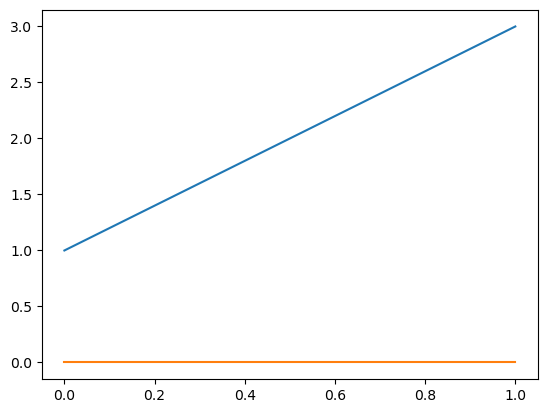

In [56]:
tspan = (0., transient)
prob = de.ODEProblem(f, u0, tspan, p)
sol = de.solve(prob)

sol_t = np.array(sol.t)
sol_partial_obs = np.stack([u_i for u_i in sol.u])

plt.plot(sol_t,sol_partial_obs)
plt.show()

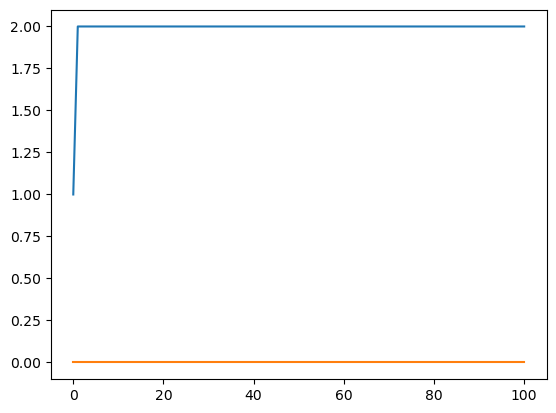

In [161]:
tspan = (0., t_end)
prob = de.DiscreteProblem(f, u0, tspan, p)
sol = de.solve(prob)

sol_t = np.array(sol.t)
sol_partial_obs = np.stack([u_i for u_i in sol.u])

plt.plot(sol_t,sol_partial_obs)
plt.show()

In [163]:
sol_t

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100.])

In [80]:
# parameters
transient = 1.
t_end = 100.
dt = 1e-2
p = np.random.rand(1000,1000)
#p = np.asfortranarray(np.random.rand(1000,1000))
u0 = np.random.rand(1000)

In [77]:
jl.seval("using LinearAlgebra")
f = de.seval("""
function f(du,u,p,t)
    du .= p*u
end""")

In [81]:
%%timeit
tspan = (0., 1.)
prob = de.ODEProblem(f, u0, tspan, p)
sol = de.solve(prob)

sol_t = np.array(sol.t)
sol_partial_obs = np.stack([u_i for u_i in sol.u])

#plt.plot(sol_t,sol_partial_obs)
#plt.show()

851 ms ± 1.38 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
ss = SanoSawada(sol_partial_obs,num_neighbor,dt,step_jac,epsilon,td_idx)

In [6]:
ss.set_radius_of_ball_for_neighboring_points_search()
ss.radius

0.8397629356384277

In [13]:
arr = np.array([1, 2, 3, 4])
eps = 1.5
diffs = np.abs(arr[:, np.newaxis] - arr[np.newaxis, :])
diffs
arr2 = diffs < eps
print(arr2)
print(np.where(arr2[1]))

[[ True  True False False]
 [ True  True  True False]
 [False  True  True  True]
 [False False  True  True]]
(array([0, 1, 2], dtype=int64),)


In [99]:
arr = np.arange(10)
brr = np.array([0,-1,-2,-3])
crr = np.empty((len(arr),len(brr)))

In [100]:
for i in range(1,crr.shape[1]): 
    crr[:,i] = np.roll(arr,-brr[i])

crr

array([[0., 9., 8., 7.],
       [1., 0., 9., 8.],
       [2., 1., 0., 9.],
       [3., 2., 1., 0.],
       [4., 3., 2., 1.],
       [5., 4., 3., 2.],
       [6., 5., 4., 3.],
       [7., 6., 5., 4.],
       [8., 7., 6., 5.],
       [9., 8., 7., 6.]])

In [181]:
diffs = crr[np.newaxis, :, :] - crr[2::2, np.newaxis, :] 
drr = np.linalg.norm(diffs, axis=2)
print(diffs)
print(drr)

[[[-2.  8.  8. -2.]
  [-1. -1.  9. -1.]
  [ 0.  0.  0.  0.]
  [ 1.  1.  1. -9.]
  [ 2.  2.  2. -8.]
  [ 3.  3.  3. -7.]
  [ 4.  4.  4. -6.]
  [ 5.  5.  5. -5.]
  [ 6.  6.  6. -4.]
  [ 7.  7.  7. -3.]]

 [[-4.  6.  6.  6.]
  [-3. -3.  7.  7.]
  [-2. -2. -2.  8.]
  [-1. -1. -1. -1.]
  [ 0.  0.  0.  0.]
  [ 1.  1.  1.  1.]
  [ 2.  2.  2.  2.]
  [ 3.  3.  3.  3.]
  [ 4.  4.  4.  4.]
  [ 5.  5.  5.  5.]]

 [[-6.  4.  4.  4.]
  [-5. -5.  5.  5.]
  [-4. -4. -4.  6.]
  [-3. -3. -3. -3.]
  [-2. -2. -2. -2.]
  [-1. -1. -1. -1.]
  [ 0.  0.  0.  0.]
  [ 1.  1.  1.  1.]
  [ 2.  2.  2.  2.]
  [ 3.  3.  3.  3.]]

 [[-8.  2.  2.  2.]
  [-7. -7.  3.  3.]
  [-6. -6. -6.  4.]
  [-5. -5. -5. -5.]
  [-4. -4. -4. -4.]
  [-3. -3. -3. -3.]
  [-2. -2. -2. -2.]
  [-1. -1. -1. -1.]
  [ 0.  0.  0.  0.]
  [ 1.  1.  1.  1.]]]
[[11.66190379  9.16515139  0.          9.16515139  8.71779789  8.71779789
   9.16515139 10.         11.13552873 12.489996  ]
 [11.13552873 10.77032961  8.71779789  2.          0.          2.
 

In [125]:
eps=10.0
mask = drr < eps
print(mask)
mask[np.arange(mask.shape[0]),np.arange(0,mask.shape[1],2)] = False
mask

[[ True  True False False False False  True  True  True  True]
 [False  True  True  True  True  True  True False False False]
 [False False  True  True  True  True  True  True  True False]
 [ True False  True  True  True  True  True  True  True  True]
 [ True False False False  True  True  True  True  True  True]]


array([[False,  True, False, False, False, False,  True,  True,  True,
         True],
       [False,  True, False,  True,  True,  True,  True, False, False,
        False],
       [False, False,  True,  True, False,  True,  True,  True,  True,
        False],
       [ True, False,  True,  True,  True,  True, False,  True,  True,
         True],
       [ True, False, False, False,  True,  True,  True,  True, False,
         True]])

In [126]:
diffs.shape

(5, 10, 4)

In [129]:
np.where(mask[0])

(array([1, 6, 7, 8, 9], dtype=int64),)

In [141]:
mask[0].shape

(10,)

In [132]:
N = 2

In [142]:
err = np.empty((diffs.shape[0], N, diffs.shape[2]))
for i in range(err.shape[0]):
    indices = np.where(mask[i])[0]
    print(indices[0:N])
    err[i,:,:] = diffs[i,indices[:N],:]

[1 6]
[1 3]
[2 3]
[0 2]
[0 4]


In [154]:
A = np.empty((3,3,3),order='F')
print(A)
B = np.random.rand(3,3)
print(B)
A[:,:,0] = B.T
print(A[:,:,0])

[[[0.5368481  0.44470927 0.21996091]
  [0.10911457 0.96112285 0.36958808]
  [0.41410592 0.18659161 0.01700348]]

 [[0.86451861 0.08249075 0.93277203]
  [0.26677057 0.1364656  0.79759994]
  [0.42282928 0.59732898 0.40029042]]

 [[0.74573383 0.30547719 0.00328904]
  [0.93167953 0.30198963 0.94094818]
  [0.05098671 0.96164662 0.3758476 ]]]
[[0.87577103 0.56268934 0.76763289]
 [0.27544277 0.03882453 0.86582222]
 [0.57329634 0.98890423 0.06401542]]
[[0.87577103 0.27544277 0.57329634]
 [0.56268934 0.03882453 0.98890423]
 [0.76763289 0.86582222 0.06401542]]


In [168]:
print(B)
print(np.mean(B,axis=1))
np.mean(B[0])

[[0.87577103 0.56268934 0.76763289]
 [0.27544277 0.03882453 0.86582222]
 [0.57329634 0.98890423 0.06401542]]
[0.73536442 0.39336317 0.54207199]


0.7353644184064079

In [143]:
err

array([[[ 1., -9.,  1.,  1.],
        [ 6., -4., -4., -4.]],

       [[-1., -1.,  9., -1.],
        [ 1.,  1.,  1., -9.]],

       [[-2., -2., -2.,  8.],
        [-1., -1., -1., -1.]],

       [[-6.,  4.,  4.,  4.],
        [-4., -4., -4.,  6.]],

       [[-8.,  2.,  2.,  2.],
        [-4., -4., -4., -4.]]])

In [18]:
t_array = np.array(sol.t)
u_array = np.stack([np.array(u_i) for u_i in sol.u])

In [2]:
from SanoSawada import SanoSawada

In [5]:
ss=SanoSawada(problem=None,dim_prob=1,dim_recon=1,num_neighbor=1,dt_prob=1.0,dt_jac=1.0,t_delay=1.0)

In [83]:
np.arange(1,9,2)

array([1, 3, 5, 7])

In [13]:
sol.t

1274-element Vector{Float32}:
   0.0
   1.0f-6
   4.5277493f-6
   1.4920923f-5
   5.040851f-5
   0.0001470003
   0.00036493386
   0.0009651219
   0.0027508056
   0.006115063
   ⋮
  99.143875
  99.253525
  99.35313
  99.48712
  99.591576
  99.71176
  99.8065
  99.91268
 100.0

In [27]:
u_1 = sol.u[-1]

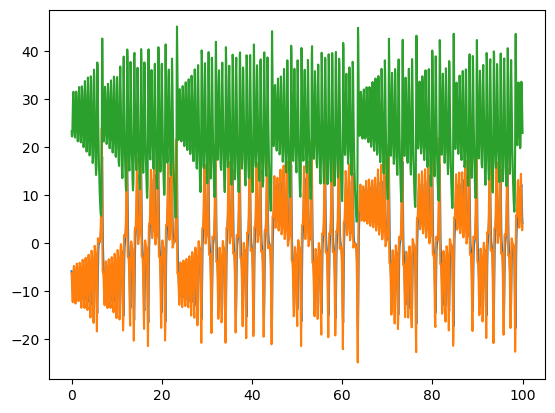

In [33]:
prob = de.ODEProblem(f, u_1, tspan, p)
jit_prob = de.jit(prob)
sol = de.solve(jit_prob)
de.transpose(de.stack(sol.u))

plt.plot(sol.t,de.transpose(de.stack(sol.u)))
plt.show()

In [34]:
sol.u

1318-element Vector{Vector{Float32}}:
 [-5.8630776, -6.278476, 23.224026]
 [-6.3303404, -7.6405153, 22.242891]
 [-7.2368197, -9.304719, 22.155851]
 [-8.895038, -11.469145, 23.783241]
 [-10.589333, -12.319485, 27.508904]
 [-11.018291, -10.293755, 31.050503]
 [-9.60218, -6.8569465, 31.47658]
 [-7.2496524, -4.757722, 28.710796]
 [-5.852051, -4.840299, 25.433908]
 [-5.772118, -6.5692735, 22.432718]
 ⋮
 [4.4731975, 4.1948123, 22.828032]
 [5.2362843, 6.9656215, 19.735819]
 [7.5010242, 10.840328, 20.062521]
 [11.302425, 14.39179, 26.698]
 [12.125466, 10.345948, 33.58846]
 [9.157833, 4.5742006, 32.771786]
 [5.625944, 2.644679, 27.78714]
 [4.067653, 3.443166, 23.019464]
 [4.0527453, 3.4856975, 22.901825]

In [15]:
t_array = np.array(sol.t)
t_array

array([0.0000000e+00, 1.0000000e-06, 4.5277493e-06, ..., 9.9806503e+01,
       9.9912682e+01, 1.0000000e+02], dtype=float32)

In [16]:
u_array = np.stack([np.array(u_i) for u_i in sol.u])
u_array

array([[ 1.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 9.9998999e-01,  2.7999844e-05,  1.3999875e-11],
       [ 9.9995470e-01,  1.2677381e-04,  2.8699224e-10],
       ...,
       [-8.4257164e+00, -5.7257214e+00,  3.0145565e+01],
       [-6.2003369e+00, -4.9879246e+00,  2.6076174e+01],
       [-5.8630776e+00, -6.2784762e+00,  2.3224026e+01]], dtype=float32)